In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor

In [2]:
Original_df = pd.read_csv('.\\auto_clean.csv')

In [3]:
Original_df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [4]:
Original_df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


## Here we get to know count,mean,min,max,etc.

In [5]:
Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

## Here we can see that there are missing values in stroke and horsepower-binned

## Let's fill those missing values

In [10]:
np.mean(Original_df.stroke)

3.2569035532994857

In [13]:
s_med = floor(Original_df.stroke.median())

In [14]:
Original_df.stroke = Original_df.stroke.fillna(s_med)

In [15]:
Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

## Now here we can that now there are no missing values

# Here i am converting some of my categorical data into numerical ones

In [16]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encoder = LabelEncoder()
x = Original_df["horsepower-binned"]
y = label_encoder.fit_transform(x)

In [20]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0,
       2, 2, 2])

In [21]:
Original_df['New_horsepower_binned']=y

In [22]:
Original_df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,New_horsepower_binned
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1,2
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1,2
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1,2
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1,2
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1,2
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,160.0,5300.0,19,25,19045.0,12.368421,High,0,1,0
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1,2
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0,2


In [23]:
Original_df.drop('horsepower-binned',axis=1,inplace=True)

In [24]:
Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              201 non-null    int64  
 1   normalized-losses      201 non-null    int64  
 2   make                   201 non-null    object 
 3   aspiration             201 non-null    object 
 4   num-of-doors           201 non-null    object 
 5   body-style             201 non-null    object 
 6   drive-wheels           201 non-null    object 
 7   engine-location        201 non-null    object 
 8   wheel-base             201 non-null    float64
 9   length                 201 non-null    float64
 10  width                  201 non-null    float64
 11  height                 201 non-null    float64
 12  curb-weight            201 non-null    int64  
 13  engine-type            201 non-null    object 
 14  num-of-cylinders       201 non-null    object 
 15  engine

In [25]:
label_encoder = LabelEncoder()
x1 = Original_df["engine-type"]
y1 = label_encoder.fit_transform(x1)

In [26]:
y1

array([0, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 4, 2, 2, 2, 2, 2, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2])

In [27]:
Original_df["New_engine_type"]=y1

In [28]:
label_encoder = LabelEncoder()
x2 = Original_df["num-of-cylinders"]
y2 = label_encoder.fit_transform(x2)

In [29]:
y2

array([2, 2, 3, 2, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 5, 2, 2, 2, 2, 2, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 2])

In [30]:
Original_df["New_no_of_cylinders"]=y2

In [31]:
label_encoder = LabelEncoder()
x3 = Original_df["fuel-system"]
y3 = label_encoder.fit_transform(x3)

In [32]:
y3

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1,
       5, 1, 1, 1, 5, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 1, 7,
       5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 5, 1, 1, 1, 1, 3, 1, 5, 3, 3, 3,
       3, 3, 5, 5, 5, 5, 5, 1, 1, 1, 6, 6, 1, 6, 6, 6, 1, 1, 6, 6, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 1, 6, 1, 1, 1, 1, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 1, 1, 1, 1, 1, 5, 1, 5, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5,
       5, 5, 3, 5, 3, 5, 5, 3, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 3, 5])

In [33]:
Original_df["New_fuel_system"]=y3

In [34]:
Original_df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,city-L/100km,diesel,gas,New_horsepower_binned,New_engine_type,New_no_of_cylinders,New_fuel_system
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495.0,11.190476,0,1,2,0,2,5
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,0,1,2,0,2,5
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,0,1,2,4,3,5
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,0,1,2,2,2,5
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,0,1,2,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,23,28,16845.0,10.217391,0,1,2,2,2,5
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,19,25,19045.0,12.368421,0,1,0,2,2,5
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,18,23,21485.0,13.055556,0,1,2,4,3,5
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,26,27,22470.0,9.038462,1,0,2,2,3,3


In [35]:
label_encoder = LabelEncoder()
x4 = Original_df["drive-wheels"]
y4 = label_encoder.fit_transform(x4)

In [36]:
y4

array([2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

In [37]:
Original_df["New_drive_wheels"]=y4

In [38]:
label_encoder = LabelEncoder()
x5 = Original_df["aspiration"]
y5 = label_encoder.fit_transform(x5)

In [39]:
y5

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1])

In [40]:
Original_df["New_aspiration"]=y5

In [41]:
Original_df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,price,city-L/100km,diesel,gas,New_horsepower_binned,New_engine_type,New_no_of_cylinders,New_fuel_system,New_drive_wheels,New_aspiration
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,13495.0,11.190476,0,1,2,0,2,5,2,0
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,16500.0,11.190476,0,1,2,0,2,5,2,0
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,16500.0,12.368421,0,1,2,4,3,5,2,0
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,13950.0,9.791667,0,1,2,2,2,5,1,0
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,17450.0,13.055556,0,1,2,2,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,16845.0,10.217391,0,1,2,2,2,5,2,0
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,19045.0,12.368421,0,1,0,2,2,5,2,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,21485.0,13.055556,0,1,2,4,3,5,2,0
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,22470.0,9.038462,1,0,2,2,3,3,2,1


## Now we can see in our original dataframe that there are some addditional features that has been created by updating categorical data

In [42]:
Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              201 non-null    int64  
 1   normalized-losses      201 non-null    int64  
 2   make                   201 non-null    object 
 3   aspiration             201 non-null    object 
 4   num-of-doors           201 non-null    object 
 5   body-style             201 non-null    object 
 6   drive-wheels           201 non-null    object 
 7   engine-location        201 non-null    object 
 8   wheel-base             201 non-null    float64
 9   length                 201 non-null    float64
 10  width                  201 non-null    float64
 11  height                 201 non-null    float64
 12  curb-weight            201 non-null    int64  
 13  engine-type            201 non-null    object 
 14  num-of-cylinders       201 non-null    object 
 15  engine

# Here i am droping some of the features which i think will not be useful for our analysis

In [44]:
Original_df.drop(Original_df[['engine-location','num-of-doors','make','body-style','engine-type','num-of-cylinders','fuel-system','aspiration']],axis=1,inplace=True)

In [47]:
Original_df.drop('drive-wheels',axis=1,inplace=True)

In [48]:
Original_df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,price,city-L/100km,diesel,gas,New_horsepower_binned,New_engine_type,New_no_of_cylinders,New_fuel_system,New_drive_wheels,New_aspiration
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,...,13495.0,11.190476,0,1,2,0,2,5,2,0
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,...,16500.0,11.190476,0,1,2,0,2,5,2,0
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,...,16500.0,12.368421,0,1,2,4,3,5,2,0
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,...,13950.0,9.791667,0,1,2,2,2,5,1,0
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,...,17450.0,13.055556,0,1,2,2,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,...,16845.0,10.217391,0,1,2,2,2,5,2,0
197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,...,19045.0,12.368421,0,1,0,2,2,5,2,1
198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,...,21485.0,13.055556,0,1,2,4,3,5,2,0
199,-1,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,...,22470.0,9.038462,1,0,2,2,3,3,2,1


In [49]:
Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              201 non-null    int64  
 1   normalized-losses      201 non-null    int64  
 2   wheel-base             201 non-null    float64
 3   length                 201 non-null    float64
 4   width                  201 non-null    float64
 5   height                 201 non-null    float64
 6   curb-weight            201 non-null    int64  
 7   engine-size            201 non-null    int64  
 8   bore                   201 non-null    float64
 9   stroke                 201 non-null    float64
 10  compression-ratio      201 non-null    float64
 11  horsepower             201 non-null    float64
 12  peak-rpm               201 non-null    float64
 13  city-mpg               201 non-null    int64  
 14  highway-mpg            201 non-null    int64  
 15  price 

## Here we can see the change in our original dataframe

## Now we will seperate our classification feature and input feature

In [51]:
classification = Original_df[['diesel','gas']]
Attributes = Original_df.drop(columns=classification)

## Now we will analyse our classification feature using piechart

([<matplotlib.patches.Wedge at 0x196f4da2a60>,
 [Text(1.046692174973808, 0.3382831518840387, 'diesel'),
  Text(-1.046692190809984, -0.33828310288484104, 'gas')],
 [Text(0.570923004531168, 0.18451808284583926, '9.95%'),
  Text(-0.5709230131690821, -0.18451805611900418, '90.05%')])

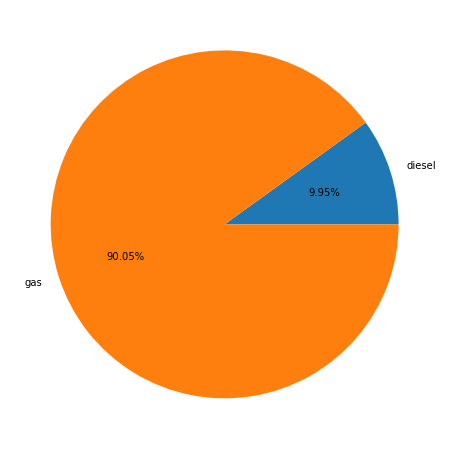

In [52]:
plt.subplots(figsize = ([8,8]))
plt.pie(x=classification.value_counts().sort_values(),autopct = '%.2f%%',labels=classification.columns)

## By analysing piechart we can come to know that most of the cars runs on gas

array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'normalized-losses'}>,
        <AxesSubplot:title={'center':'wheel-base'}>,
        <AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'width'}>],
       [<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb-weight'}>,
        <AxesSubplot:title={'center':'engine-size'}>,
        <AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>],
       [<AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'peak-rpm'}>,
        <AxesSubplot:title={'center':'city-mpg'}>,
        <AxesSubplot:title={'center':'highway-mpg'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'city-L/100km'}>,
        <AxesSubplot:title={'center':'diesel'}>,
        <AxesSubplot:title={'center':'gas'}>,
        <AxesSu

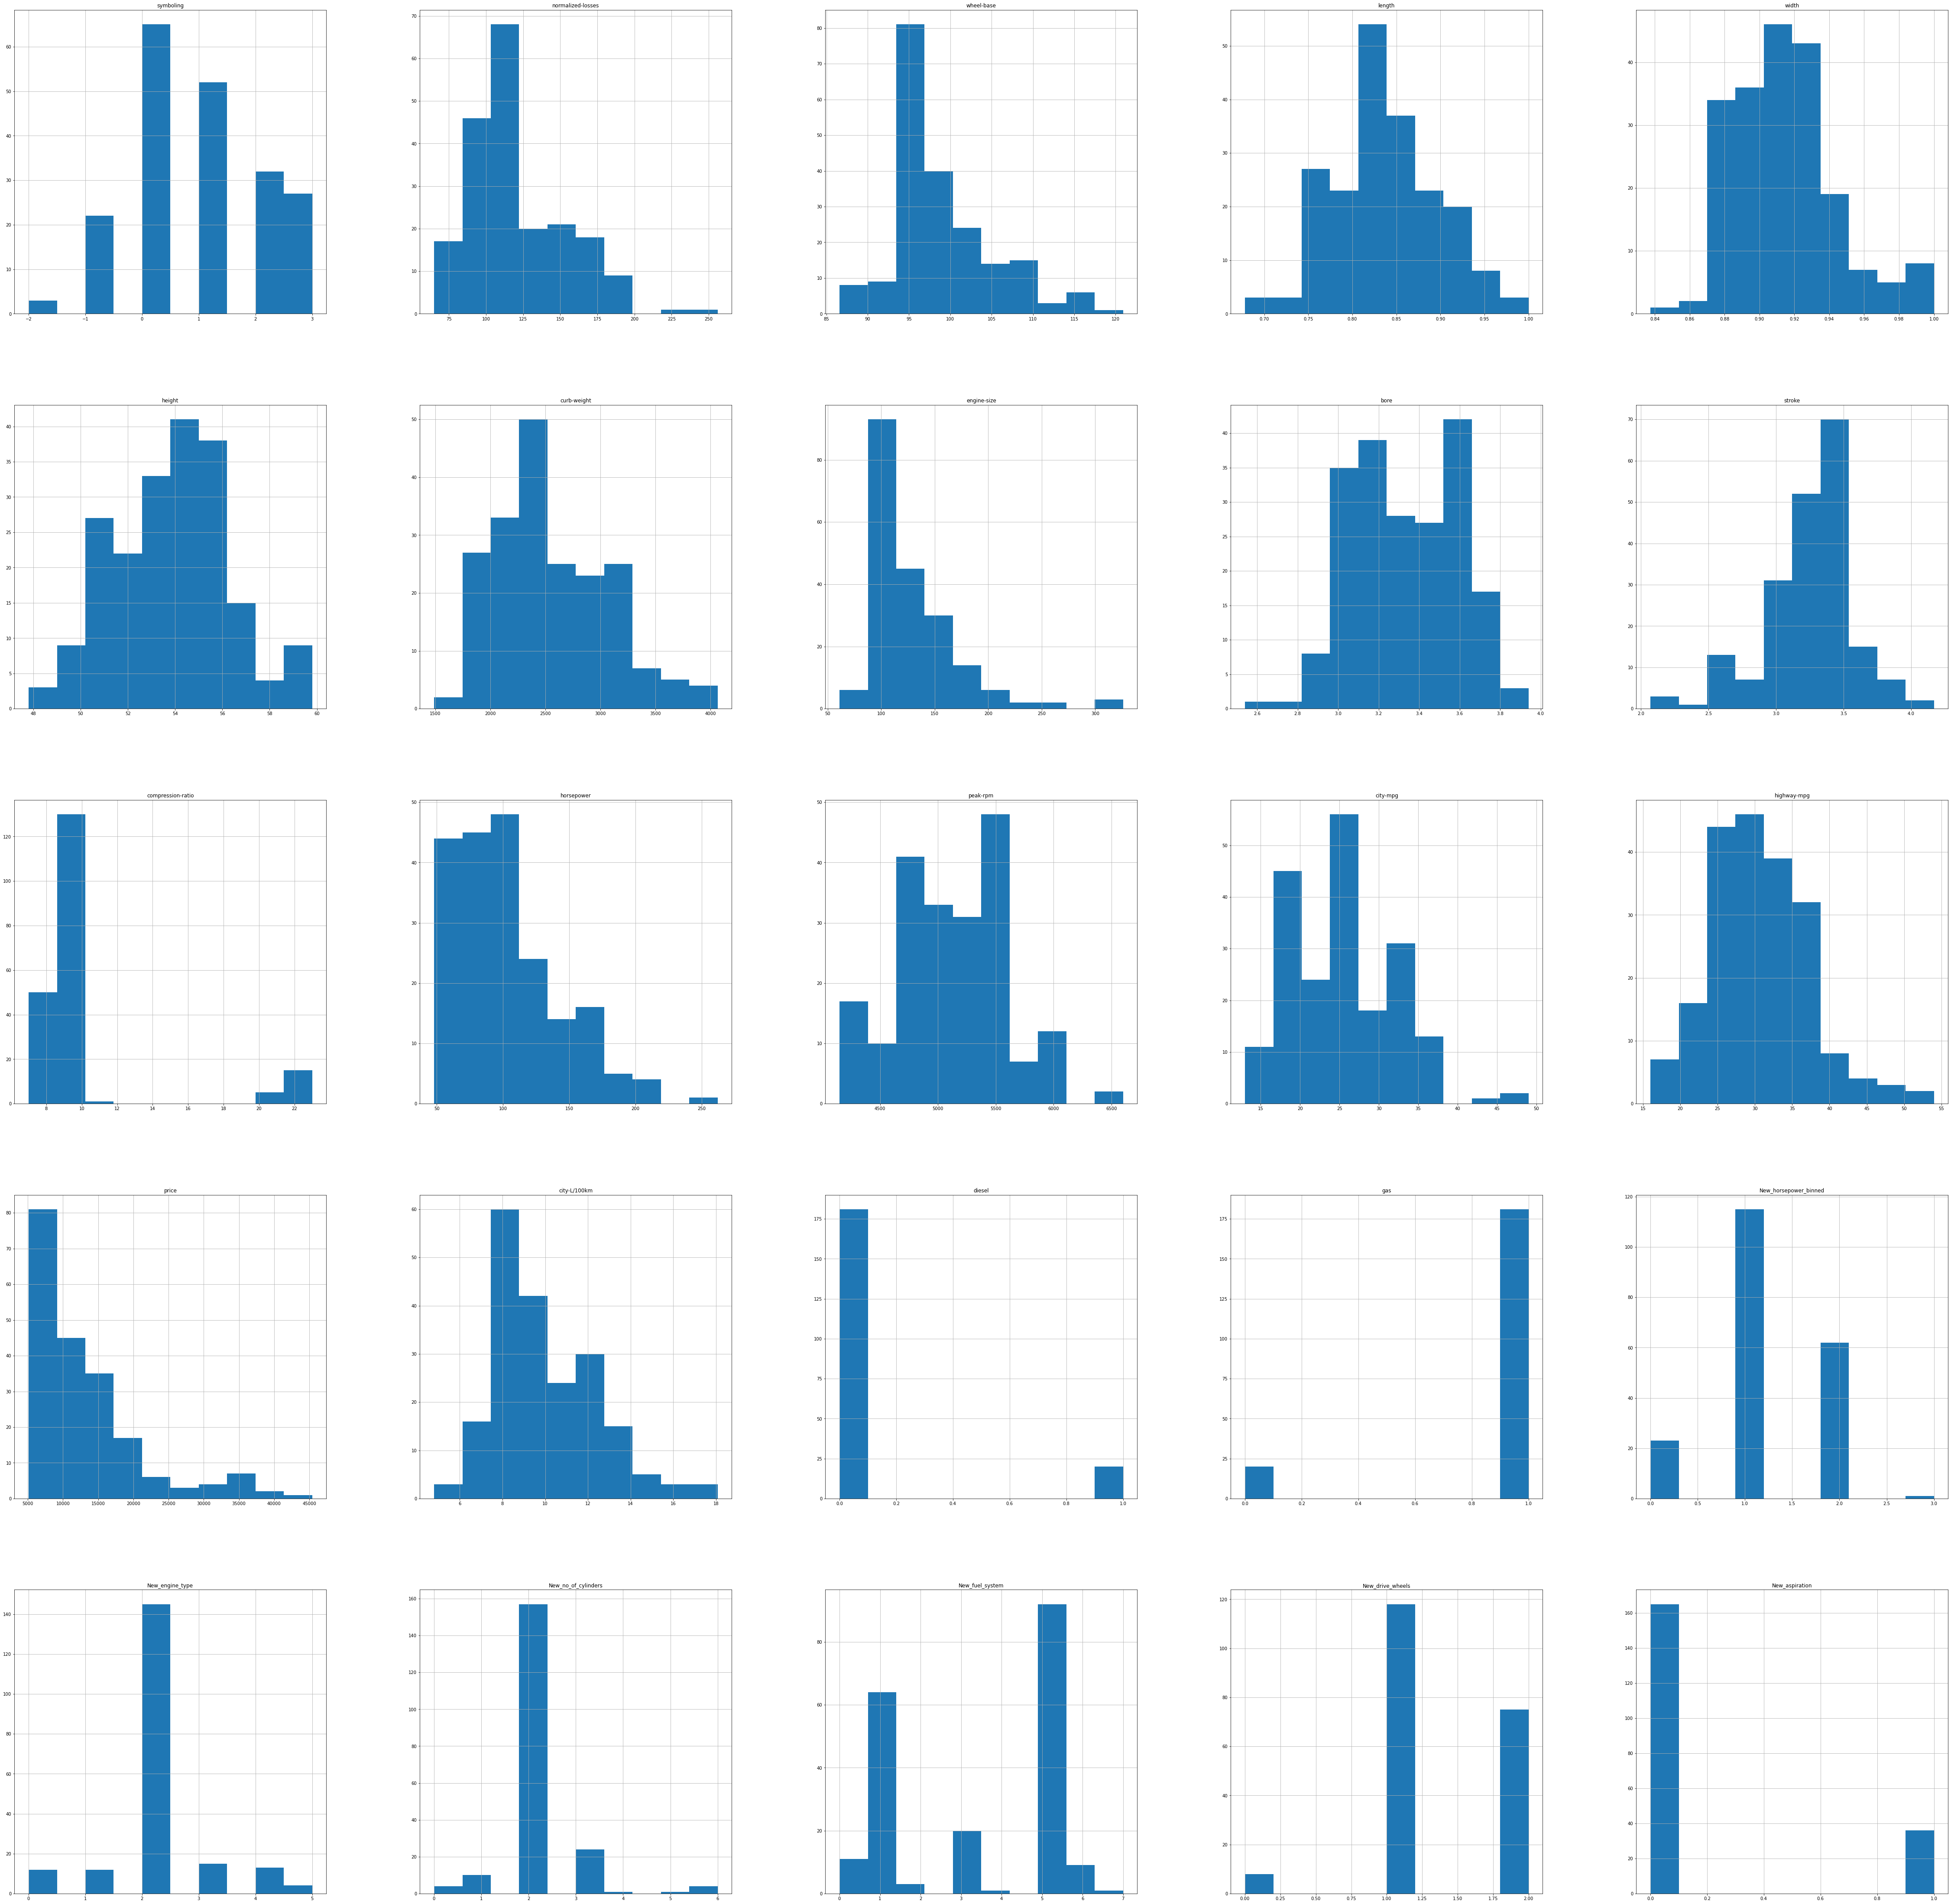

In [53]:
Original_df.hist(figsize = ([80,80]))

## By looking at histograms:
### Most of the cars give MPG at highway is 24 to 38
### Most of the cars have the stroke from 3.0 to 3.5
### Most of the cars have width from 0.87 to 0.95
### Most of the cars price ranges from 5000 to 15000
### Most of cars have height ranges from 52-57

<AxesSubplot:>

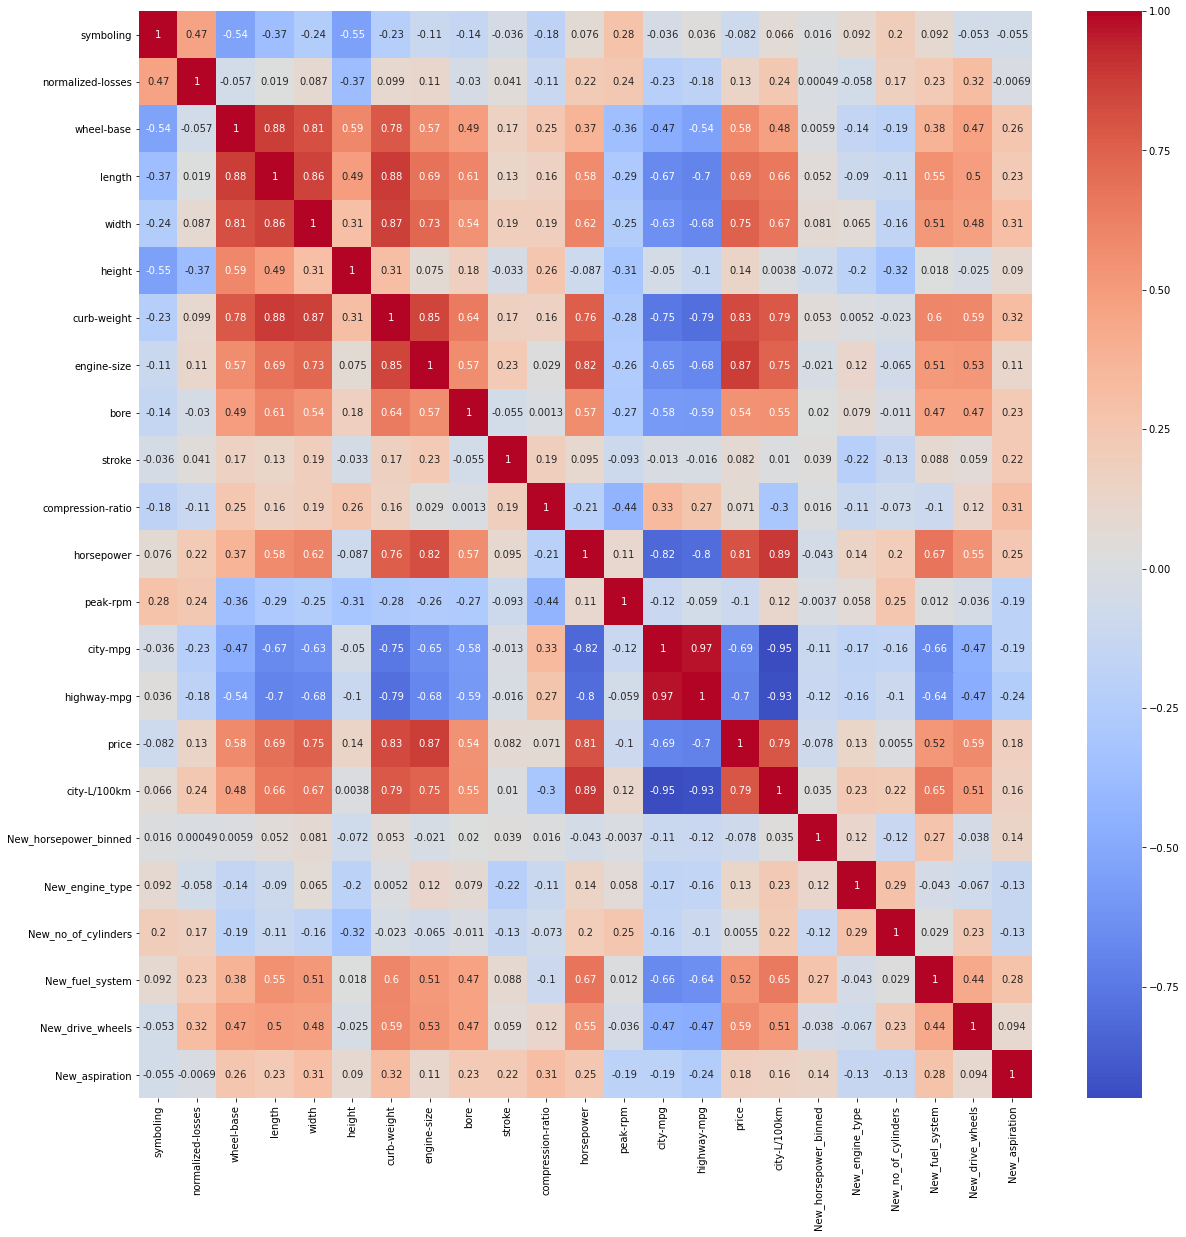

In [54]:
import seaborn as sn
plt.subplots(figsize = ([20,20]))
sn.heatmap(Attributes.corr(),cmap="coolwarm",annot=True)

## By visualizimg the heatmap
### highway MPG is highly correlated with City MPG
### length is highly correlated with wheel-base
### price is highly correlated with engine-size
### highway MPG is not at all correlated with curb weight
### city MPG is not at all correlated with City-L/100

## Let's see some of the correlation

<AxesSubplot:xlabel='curb-weight', ylabel='length'>

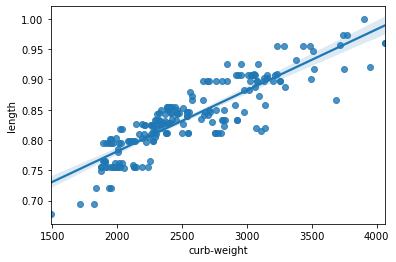

In [55]:
sn.regplot(x=Original_df['curb-weight'],y=Original_df['length'])

<AxesSubplot:xlabel='wheel-base', ylabel='length'>

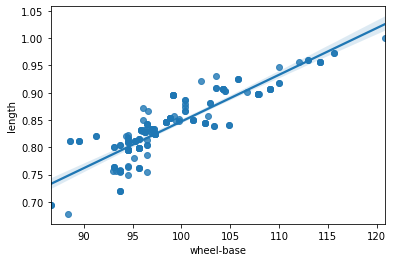

In [56]:
sn.regplot(x=Original_df['wheel-base'],y=Original_df['length'])

<AxesSubplot:xlabel='engine-size', ylabel='price'>

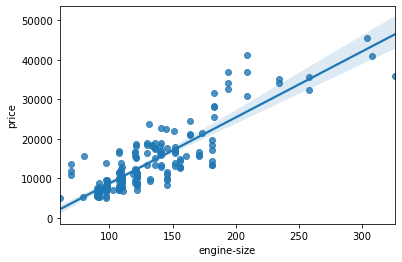

In [57]:
sn.regplot(x=Original_df['engine-size'],y=Original_df['price'])

<AxesSubplot:xlabel='highway-mpg', ylabel='city-mpg'>

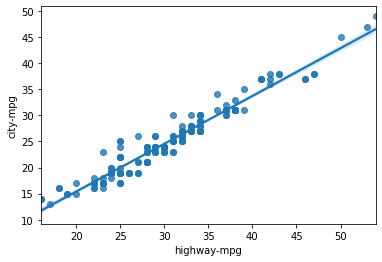

In [58]:
sn.regplot(x=Original_df['highway-mpg'],y=Original_df['city-mpg'])

# Let's find the skewness of the data

In [59]:
feature_skewness = pd.DataFrame(Attributes.skew())
feature_skewness.sort_values(ascending = False,by=0)

,0
compression-ratio,2.584462
New_no_of_cylinders,2.322379
engine-size,1.979144
price,1.809675
New_aspiration,1.686384
horsepower,1.146517
wheel-base,1.031261
width,0.875029
normalized-losses,0.846546
curb-weight,0.705804


## Let's visualize in a better way

C:\Users\Yash Choudhari\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compression-ratio', ylabel='Density'>

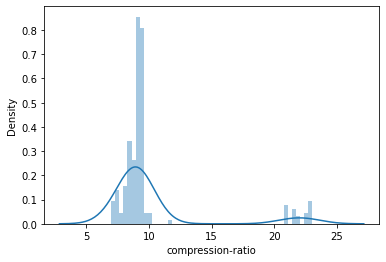

In [62]:
sn.distplot(Original_df['compression-ratio'])

C:\Users\Yash Choudhari\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='New_no_of_cylinders', ylabel='Density'>

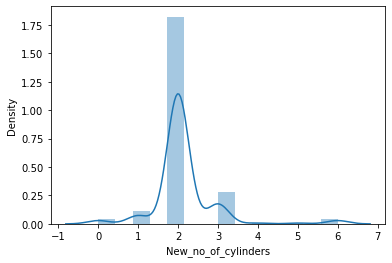

In [63]:
sn.distplot(Original_df['New_no_of_cylinders'])

C:\Users\Yash Choudhari\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stroke', ylabel='Density'>

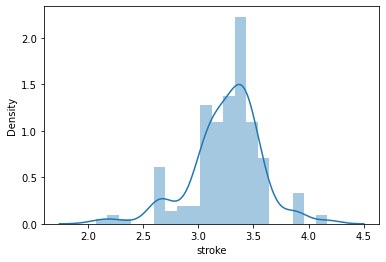

In [64]:
sn.distplot(Original_df['stroke'])

C:\Users\Yash Choudhari\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='New_fuel_system', ylabel='Density'>

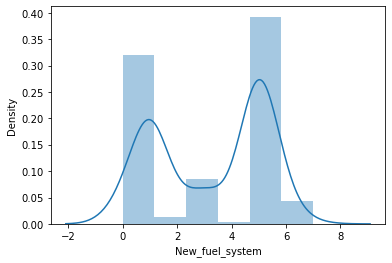

In [65]:
sn.distplot(Original_df['New_fuel_system'])

# Now let's find outliers

<AxesSubplot:>

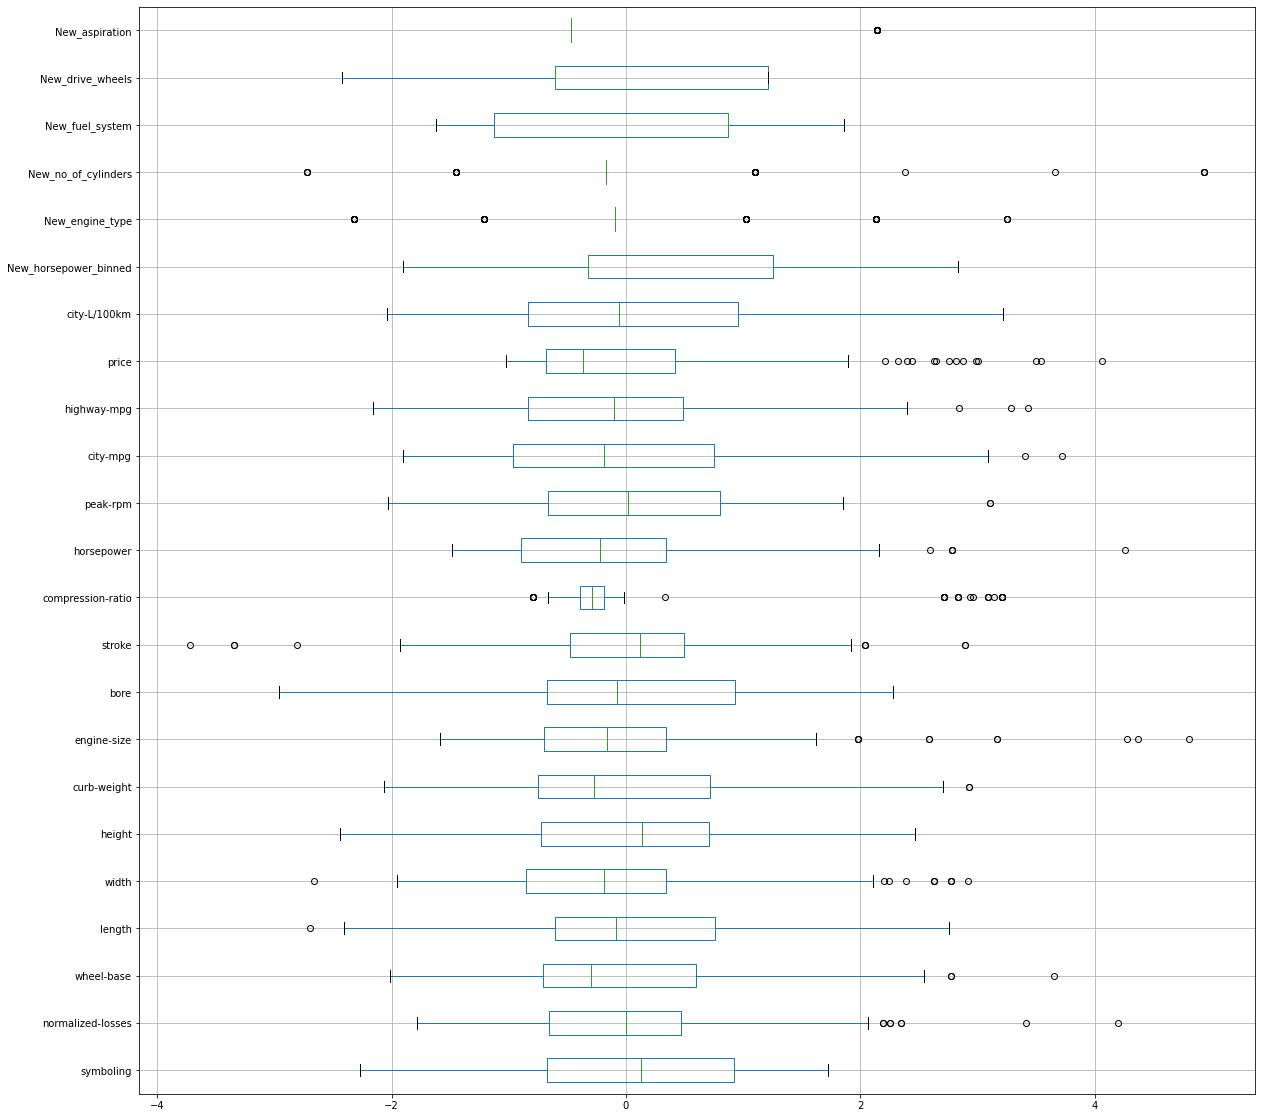

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Attributes_scaled = pd.DataFrame(scaler.fit_transform(Attributes),columns=Attributes.columns)
Attributes_scaled.boxplot(return_type = 'axes',figsize=(20,20),vert=False)

# By analysing boxplot :
## drive-wheels,fuel-system,horsepower-binned,height,symboling these data are well structured

# Summary:
## There were some missing values in the data 
## Most cars runs on gas
## There are some highly correlated data and some are not at all correlated
## Some of the datas are well structured
## Compression-ratio is most positive skewed data and stroke is most negative skewed data

In [67]:
Attributes_scaled

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,city-mpg,highway-mpg,price,city-L/100km,New_horsepower_binned,New_engine_type,New_no_of_cylinders,New_fuel_system,New_drive_wheels,New_aspiration
0,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.520966,-1.802078,...,-0.652249,-0.542288,0.036314,0.492955,1.256768,-2.325124,-0.171457,0.867123,1.213477,-0.467099
1,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.520966,-1.802078,...,-0.652249,-0.542288,0.415385,0.492955,1.256768,-2.325124,-0.171457,0.867123,1.213477,-0.467099
2,0.127193,0.000000,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,0.606234,-2.433363,0.687715,...,-0.964397,-0.689386,0.415385,0.958861,1.256768,2.136451,1.104946,0.867123,1.213477,-0.467099
3,0.926121,1.315931,0.165748,0.195176,0.148335,0.218425,-0.423766,-0.431327,-0.526138,0.467101,...,-0.184027,-0.100993,0.093711,-0.060309,1.256768,-0.094337,-0.171457,0.867123,-0.606739,-0.467099
4,0.926121,1.315931,0.099646,0.195176,0.243744,0.218425,0.520017,0.220165,-0.526138,0.467101,...,-1.120471,-1.277779,0.535224,1.230640,1.256768,-0.094337,-1.447860,0.867123,-2.426955,-0.467099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.470664,-0.845956,1.702619,1.187733,1.436357,0.709881,0.768075,0.340812,1.680260,-0.320808,...,-0.340101,-0.395189,0.458906,0.108076,1.256768,-0.094337,-0.171457,0.867123,1.213477,-0.467099
197,-1.470664,-0.845956,1.702619,1.187733,1.388653,0.709881,0.956057,0.340812,1.680260,-0.320808,...,-0.964397,-0.836484,0.736429,0.958861,-1.900862,-0.094337,-0.171457,0.867123,1.213477,2.140872
198,-1.470664,-0.845956,1.702619,1.187733,1.436357,0.709881,0.884353,1.112950,0.932328,-1.203267,...,-1.120471,-1.130681,1.044227,1.230640,1.256768,2.136451,1.104946,0.867123,1.213477,-0.467099
199,-1.470664,-0.845956,1.702619,1.187733,1.436357,0.709881,1.281633,0.437329,-1.199277,0.467101,...,0.128120,-0.542288,1.168481,-0.358220,1.256768,-0.094337,1.104946,-0.128830,1.213477,2.140872


In [68]:
classification

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


## Here i am creating a single feature for both gas and diesel

In [69]:
Target = []
for i in range(classification.shape[0]):
    if Original_df['diesel'].values[i]==1:
        Target.append('diesel')
    else:
        Target.append('gas')
        
Target = pd.DataFrame(Target)
Original_df['Target']=Target    

In [70]:
Original_df['Target']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
196       gas
197       gas
198       gas
199    diesel
200       gas
Name: Target, Length: 201, dtype: object

In [71]:
Original_df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,city-L/100km,diesel,gas,New_horsepower_binned,New_engine_type,New_no_of_cylinders,New_fuel_system,New_drive_wheels,New_aspiration,Target
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,...,11.190476,0,1,2,0,2,5,2,0,gas
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,...,11.190476,0,1,2,0,2,5,2,0,gas
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,...,12.368421,0,1,2,4,3,5,2,0,gas
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,...,9.791667,0,1,2,2,2,5,1,0,gas
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,...,13.055556,0,1,2,2,1,5,0,0,gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,...,10.217391,0,1,2,2,2,5,2,0,gas
197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,...,12.368421,0,1,0,2,2,5,2,1,gas
198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,...,13.055556,0,1,2,4,3,5,2,0,gas
199,-1,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,...,9.038462,1,0,2,2,3,3,2,1,diesel


# Here i am again converting my output feature i.e in categorical to numerical

In [77]:
label_encoder = LabelEncoder()
x6 = Original_df["Target"]
y6 = label_encoder.fit_transform(x6)

In [78]:
Original_df['New_Target']=y6

In [82]:
New_Target=[]
New_Target = Original_df['New_Target']

# Here i am splitting my data

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Attributes_scaled,New_Target,test_size=0.3,random_state=4)

In [84]:
len(x_train)

140

In [85]:
len(x_test)

61

# Applying different algorithms

In [86]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

### Linear Regression

In [99]:
model1 = linear_model.LinearRegression()
model1.fit(x_train,y_train)
model1_pred = model1.predict(x_test)

In [100]:
model1.score(x_test,y_test)

0.9849527068981185

### Logistic Regression

In [101]:
model2 = linear_model.LogisticRegression()
model2.fit(x_train,y_train)
model2_pred = model2.predict(x_test)

In [102]:
model2.score(x_test,y_test)

1.0

### Decision Tree

In [103]:
model3=tree.DecisionTreeClassifier()
model3.fit(x_train,y_train)
model3_pred = model3.predict(x_test)

In [105]:
model3.score(x_test,y_test)

1.0

### Random Forest

In [106]:
model4=ensemble.RandomForestClassifier(n_estimators=20)
model4.fit(x_train,y_train)
model4_pred = model4.predict(x_test)

In [107]:
model4.score(x_test,y_test)

1.0

### SVM

In [108]:
model5 = svm.SVC(C=1,gamma="auto",kernel="linear")
model5.fit(x_train,y_train)
model5_pred = model5.predict(x_test)

In [109]:
model5.score(x_test,y_test)

1.0

### KNN

In [110]:
model6 = KNeighborsClassifier(n_neighbors=4)
model6.fit(x_train,y_train)
model6_pred = model6.predict(x_test)

In [111]:
model6.score(x_test,y_test)

1.0

## By looking above we can check scores for each algorithm.

## But for better visualisation i have created a new dataframe depending upon the accuracy score for each model

In [116]:
dict1={'Models':('Linear Regression','Logistic Regression','Decision Tree','Random Forest','SVM','KNN'),'Accuracy%':(98,100,100,100,100,100)}
New_df=pd.DataFrame(dict1)

In [117]:
New_df

,Models,Accuracy%
0,Linear Regression,98
1,Logistic Regression,100
2,Decision Tree,100
3,Random Forest,100
4,SVM,100
5,KNN,100


## For better visualisation let's plot a barplot

C:\Users\Yash Choudhari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


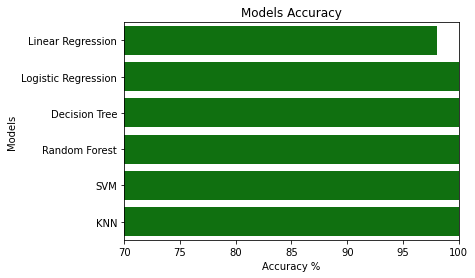

In [118]:
sn.barplot(New_df['Accuracy%'],New_df['Models'], color="g")
plt.xlim([70,100])
plt.xlabel('Accuracy %')
plt.title('Models Accuracy')
plt.show()

# Here i come to the conclusion that for the given dataset all the supervised learning algorithm will work in effecient way.